In [3750]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [3751]:
data_file = "conso.txt"

In [3752]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [3753]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [3754]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


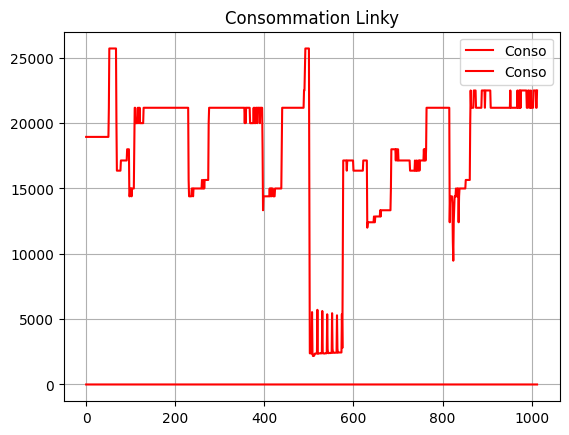

In [3755]:

plt.title('Consommation Linky')
plt.plot(data, color='red',label='Conso')

plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [3756]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [3757]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52714 entries, 0 to 52713
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Interval  52714 non-null  int64  
 1   kWh       52714 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 823.8 KB


In [3758]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
52709,22741,0.16
52710,26008,0.14
52711,27247,0.13
52712,27174,0.13


In [3759]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
52709,22741,0.16,22.741,158.304384,1260449777
52710,26008,0.14,26.008,138.418948,1260475785
52711,27247,0.13,27.247,132.124638,1260503032
52712,27174,0.13,27.174,132.479576,1260530206


In [3760]:
# index dernier echantillon
l=len(conso_data)-1
l

52713

In [3761]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1260557336000

In [3762]:
old

False

In [3763]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 0, 25, 59, 746385)

In [3764]:

if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)


conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52714 entries, 0 to 52713
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   52714 non-null  int64         
 1   kWh        52714 non-null  float64       
 2   sec        52714 non-null  float64       
 3   Wh         52714 non-null  float64       
 4   cumul(ms)  52714 non-null  int64         
 5   dates      52714 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.4 MB


In [3765]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:26:26.035385,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:26:52.278385,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:27:18.163385,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:27:43.917385,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:28:09.691385,07/03/2024
...,...,...,...,...,...,...,...
52709,22741,0.16,22.741,158.304384,1260449777,2024-03-21 14:33:29.523385,21/03/2024
52710,26008,0.14,26.008,138.418948,1260475785,2024-03-21 14:33:55.531385,21/03/2024
52711,27247,0.13,27.247,132.124638,1260503032,2024-03-21 14:34:22.778385,21/03/2024
52712,27174,0.13,27.174,132.479576,1260530206,2024-03-21 14:34:49.952385,21/03/2024


In [3766]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 00:26:26.035385   
 
          days  
 0  07/03/2024  ,
        Interval   kWh    sec          Wh   cumul(ms)  \
 52713     27130  0.13  27.13  132.694434  1260557336   
 
                            dates        days  
 52713 2024-03-21 14:35:17.082385  21/03/2024  )

In [3767]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day

'21/03/2024'

In [3768]:
month, year

(3, 2024)

In [3769]:
def conso_by_day(day):
    conso_day = conso_data[conso_data['days']==day]
    conso_jour = len(conso_day)/1000
    return conso_jour



In [3773]:
conso_graph=[]
for d in range(7,now.day+1):
    if d<10:prefd='0'
    else:prefd=''
    if month<10:prefm='0'
    else:prefm=''
    day = f'{prefd}{d}/{prefm}{month}/{year}'
    conso_graph.append((day,conso_by_day(day)))
    #print(day,conso_by_day(day))
conso_df = pd.DataFrame(conso_graph, columns=('day','conso'))
conso_df.set_index('day',inplace=True)
conso_df

,conso
day,
07/03/2024,3.338
08/03/2024,3.760
09/03/2024,3.059
10/03/2024,3.569
11/03/2024,4.525
12/03/2024,3.551
13/03/2024,3.509
14/03/2024,3.703
15/03/2024,3.544


In [3774]:

mean = conso_df['conso'].mean()


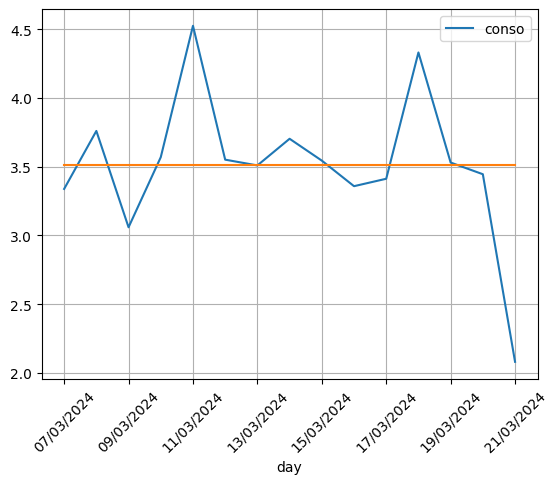

In [3775]:
conso_df.plot()
plt.plot()
plt.plot((0,len(conso_graph)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [3776]:
#manuel
#day = '19/03/2024'


In [3777]:

conso_day = conso_data[conso_data['days']==day]
conso_jour = len(conso_day)
conso_jour

2080

In [3778]:
conso_day.head(1).dates, conso_day.tail(1).dates
conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_21524\1879875640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day['dates'].map(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:4,27055,0.13,27.055,133.062281,1208044923,2024-03-21 00:00:04.669385,21/03/2024
0:0:32,27713,0.13,27.713,129.902934,1208072636,2024-03-21 00:00:32.382385,21/03/2024
0:0:59,27246,0.13,27.246,132.129487,1208099882,2024-03-21 00:00:59.628385,21/03/2024
0:1:26,26709,0.13,26.709,134.786027,1208126591,2024-03-21 00:01:26.337385,21/03/2024
0:1:53,27202,0.13,27.202,132.343210,1208153793,2024-03-21 00:01:53.539385,21/03/2024
...,...,...,...,...,...,...,...
14:33:29,22741,0.16,22.741,158.304384,1260449777,2024-03-21 14:33:29.523385,21/03/2024
14:33:55,26008,0.14,26.008,138.418948,1260475785,2024-03-21 14:33:55.531385,21/03/2024
14:34:22,27247,0.13,27.247,132.124638,1260503032,2024-03-21 14:34:22.778385,21/03/2024


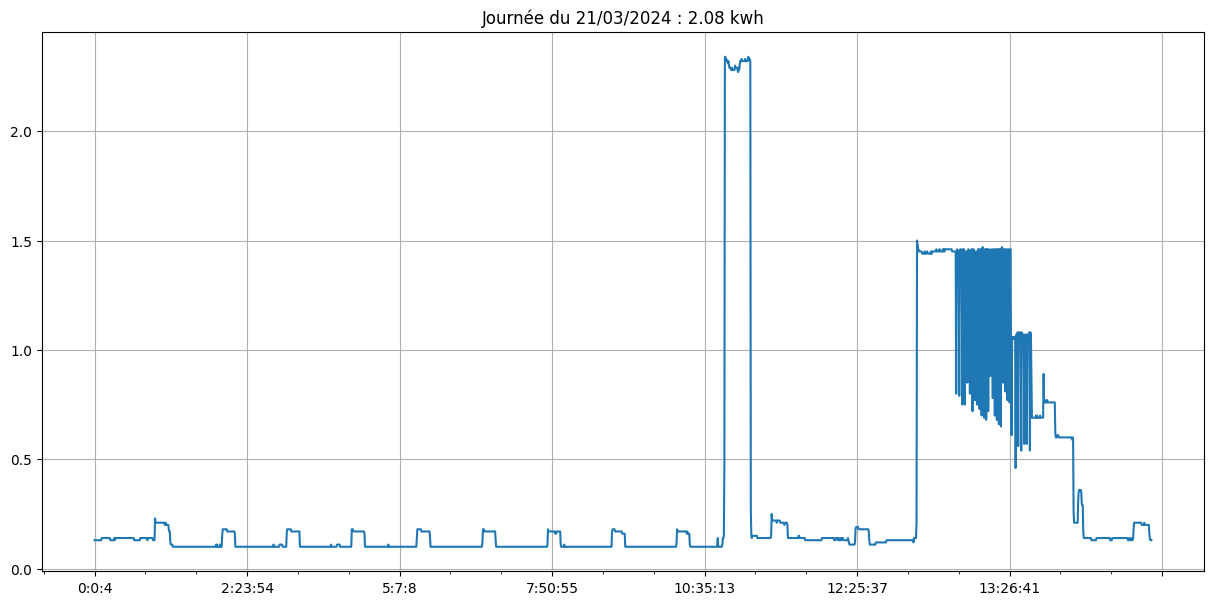

In [3779]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} : {conso_jour/1000} kwh')
plt.grid()

In [3780]:


time = conso_data['dates']
time


0       2024-03-07 00:26:26.035385
1       2024-03-07 00:26:52.278385
2       2024-03-07 00:27:18.163385
3       2024-03-07 00:27:43.917385
4       2024-03-07 00:28:09.691385
                   ...            
52709   2024-03-21 14:33:29.523385
52710   2024-03-21 14:33:55.531385
52711   2024-03-21 14:34:22.778385
52712   2024-03-21 14:34:49.952385
52713   2024-03-21 14:35:17.082385
Name: dates, Length: 52714, dtype: datetime64[ns]

In [3781]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [3782]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [3783]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

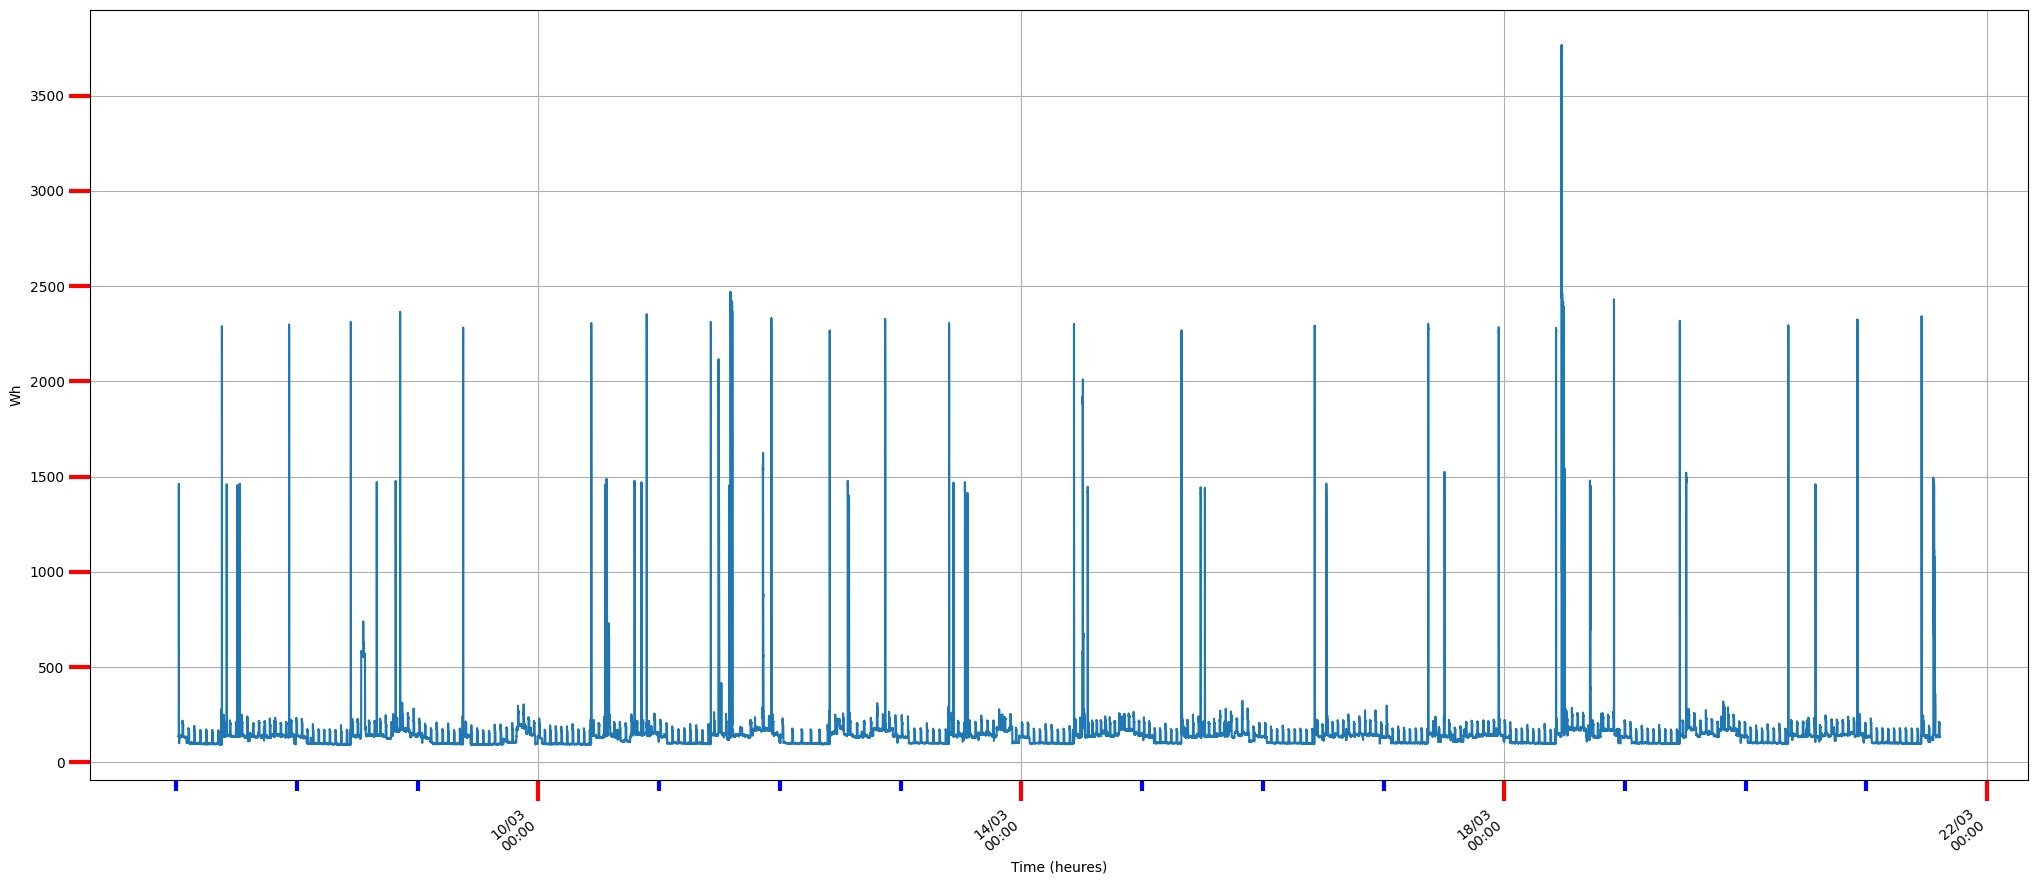

In [3784]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [3785]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
52713,27130,0.13,27.13,132.694434,1260557336,2024-03-21 14:35:17.082385,21/03/2024


In [3786]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

1260557336000

# Slice of last 1 kWh

In [3787]:
l = len(conso_data)  # total watt consommés
l

52714

In [3788]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(52714, 1000)

In [3789]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [3790]:
data = conso_data.tail(taille)
len(data),data

(1000,
        Interval   kWh     sec          Wh   cumul(ms)  \
 51714     35607  0.10  35.607  101.103716  1242197452   
 51715     35696  0.10  35.696  100.851636  1242233148   
 51716     35710  0.10  35.710  100.812097  1242268858   
 51717     35726  0.10  35.726  100.766948  1242304584   
 51718     35792  0.10  35.792  100.581135  1242340376   
 ...         ...   ...     ...         ...         ...   
 52709     22741  0.16  22.741  158.304384  1260449777   
 52710     26008  0.14  26.008  138.418948  1260475785   
 52711     27247  0.13  27.247  132.124638  1260503032   
 52712     27174  0.13  27.174  132.479576  1260530206   
 52713     27130  0.13  27.130  132.694434  1260557336   
 
                            dates        days  
 51714 2024-03-21 09:29:17.198385  21/03/2024  
 51715 2024-03-21 09:29:52.894385  21/03/2024  
 51716 2024-03-21 09:30:28.604385  21/03/2024  
 51717 2024-03-21 09:31:04.330385  21/03/2024  
 51718 2024-03-21 09:31:40.122385  21/03/2024  
 ...   

In [3791]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [3792]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [3793]:
cumtime_end,cumtime_start

(1260557336000, 1242233148000)

In [3794]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

18324188000

In [3795]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 3, 21, 14, 36, 27, 399034),
 datetime.datetime(2024, 3, 21, 9, 31, 3, 211034),
 '21/03/2024 14:35:17')

In [3796]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 00:26:26.035385,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 00:26:52.278385,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 00:27:18.163385,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 00:27:43.917385,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 00:28:09.691385,07/03/2024
...,...,...,...,...,...,...,...
52709,22741,0.16,22.741,158.304384,1260449777,2024-03-21 14:33:29.523385,21/03/2024
52710,26008,0.14,26.008,138.418948,1260475785,2024-03-21 14:33:55.531385,21/03/2024
52711,27247,0.13,27.247,132.124638,1260503032,2024-03-21 14:34:22.778385,21/03/2024
52712,27174,0.13,27.174,132.479576,1260530206,2024-03-21 14:34:49.952385,21/03/2024


In [3797]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('21/03/2024 09:29:52', '21/03/2024 14:35:17')

In [3798]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-03-21 09:29:17.198385', '2024-03-21 14:35:17.082385')

In [3799]:
k

1

In [3800]:
data.Interval.tail(1000)

51714    35607
51715    35696
51716    35710
51717    35726
51718    35792
         ...  
52709    22741
52710    26008
52711    27247
52712    27174
52713    27130
Name: Interval, Length: 1000, dtype: int64

In [3801]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(5.109858611111112, 4.696803145944839, 5, 6, 35)

In [3802]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_21524\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [3803]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
51714,35607,0.10,35.607,101.103716,1242197452,2024-03-21 09:29:17.198385,21/03/2024,2024-03-21 09:29:17.198385
51715,35696,0.10,35.696,100.851636,1242233148,2024-03-21 09:29:52.894385,21/03/2024,2024-03-21 09:29:52.894385
51716,35710,0.10,35.710,100.812097,1242268858,2024-03-21 09:30:28.604385,21/03/2024,2024-03-21 09:30:28.604385
51717,35726,0.10,35.726,100.766948,1242304584,2024-03-21 09:31:04.330385,21/03/2024,2024-03-21 09:31:04.330385
51718,35792,0.10,35.792,100.581135,1242340376,2024-03-21 09:31:40.122385,21/03/2024,2024-03-21 09:31:40.122385
...,...,...,...,...,...,...,...,...
52709,22741,0.16,22.741,158.304384,1260449777,2024-03-21 14:33:29.523385,21/03/2024,2024-03-21 14:33:29.523385
52710,26008,0.14,26.008,138.418948,1260475785,2024-03-21 14:33:55.531385,21/03/2024,2024-03-21 14:33:55.531385
52711,27247,0.13,27.247,132.124638,1260503032,2024-03-21 14:34:22.778385,21/03/2024,2024-03-21 14:34:22.778385
52712,27174,0.13,27.174,132.479576,1260530206,2024-03-21 14:34:49.952385,21/03/2024,2024-03-21 14:34:49.952385


<Axes: >

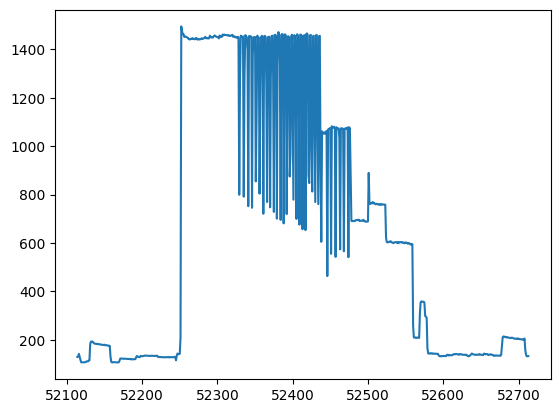

In [3804]:
data.tail(600)['Wh'].plot()

In [3805]:
data['Wh']

51714    101.103716
51715    100.851636
51716    100.812097
51717    100.766948
51718    100.581135
            ...    
52709    158.304384
52710    138.418948
52711    132.124638
52712    132.479576
52713    132.694434
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

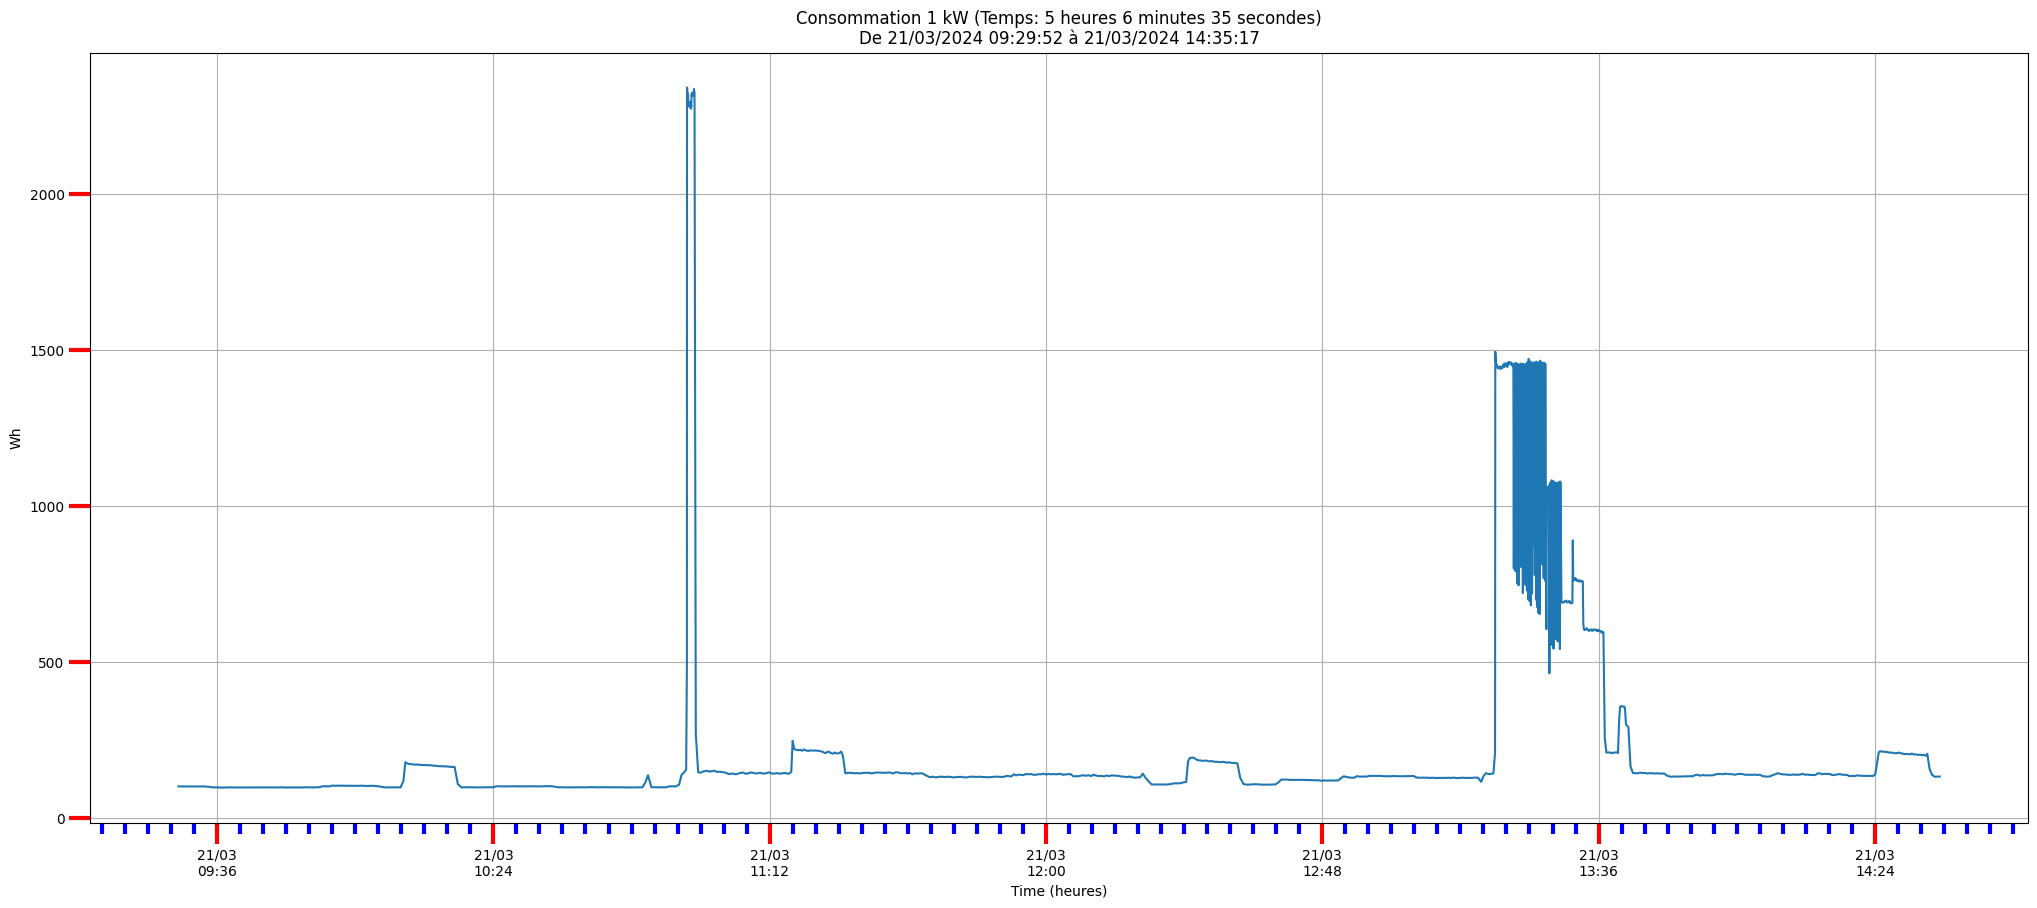

In [3806]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

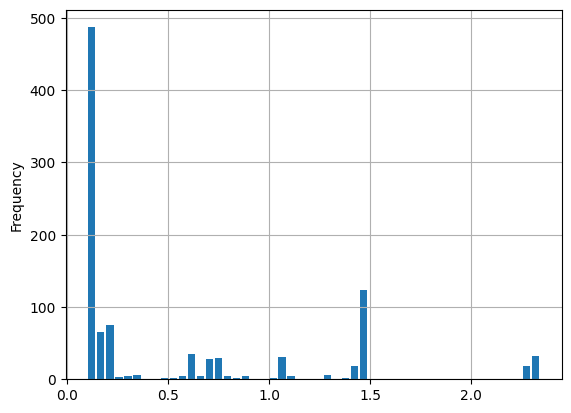

In [3807]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [3808]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
52709,22741,0.16,22.741,158.304384,1260449777,2024-03-21 14:33:29.523385,21/03/2024
52710,26008,0.14,26.008,138.418948,1260475785,2024-03-21 14:33:55.531385,21/03/2024
52711,27247,0.13,27.247,132.124638,1260503032,2024-03-21 14:34:22.778385,21/03/2024
52712,27174,0.13,27.174,132.479576,1260530206,2024-03-21 14:34:49.952385,21/03/2024
52713,27130,0.13,27.130,132.694434,1260557336,2024-03-21 14:35:17.082385,21/03/2024


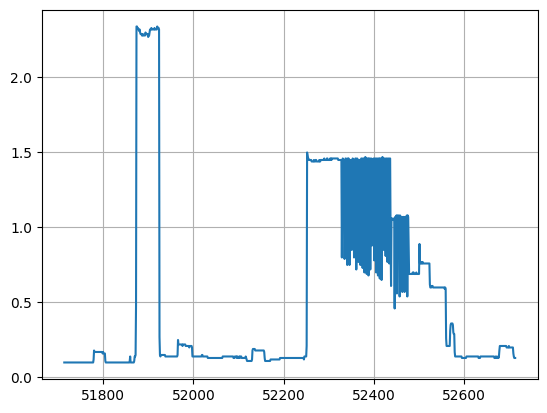

In [3809]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [3810]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(1260557336000.0, 21009.288933333333)

In [3811]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 3, 21, 14, 36, 31, 967691),
 datetime.datetime(2024, 3, 7, 0, 27, 14, 631691))

In [3812]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(52714, 1260558, 350.155)

In [3813]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [3814]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [3815]:
732/12 # 60 jours

61.0

In [3816]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

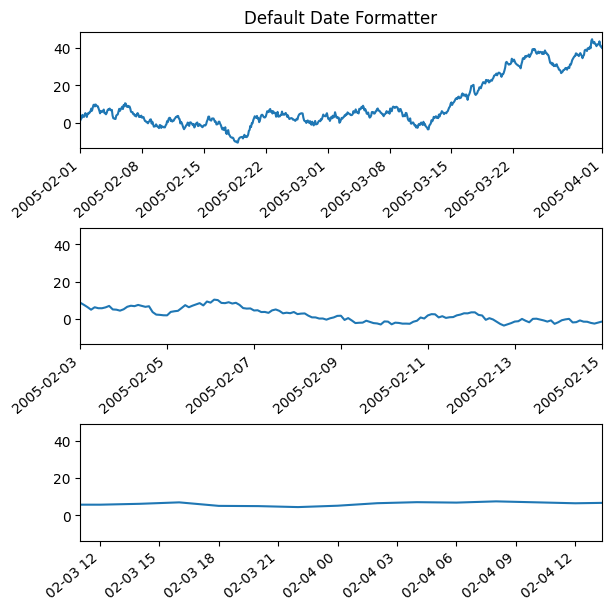

In [3817]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [3818]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)